In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import os
import psutil
import joblib
%matplotlib inline

In [82]:
df = pd.read_csv('phishing_with_features.csv')

In [83]:
df['status']=df.type.apply(lambda x: 1 if x=='phishing' else 0)

In [84]:
df.head()

,url,type,url_length,hostname_length,path_length,has_ip,has_at_symbol,count_dots,count_hyphens,count_slashes,uses_https,suspicious_words,domain,suffix,status
0,https://www.google.com,legitimate,22,14,0,False,False,2,0,2,True,0,google,com,0
1,https://www.youtube.com,legitimate,23,15,0,False,False,2,0,2,True,0,youtube,com,0
2,https://www.facebook.com,legitimate,24,16,0,False,False,2,0,2,True,0,facebook,com,0
3,https://www.baidu.com,legitimate,21,13,0,False,False,2,0,2,True,0,baidu,com,0
4,https://www.wikipedia.org,legitimate,25,17,0,False,False,2,0,2,True,0,wikipedia,org,0


In [85]:
df.dtypes

url                 object
type                object
url_length           int64
hostname_length      int64
path_length          int64
has_ip                bool
has_at_symbol         bool
count_dots           int64
count_hyphens        int64
count_slashes        int64
uses_https            bool
suspicious_words     int64
domain              object
suffix              object
status               int64
dtype: object

In [86]:
def print_memory(stage=''):
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss / (1024 ** 2)
    print(f"RAM Usage [{stage}]: {mem:.2f} MB")

In [87]:
df.drop(columns=['url','type', 'domain', 'suffix', 'count_slashes'], inplace=True, errors='ignore')

int_cols = ['url_length', 'hostname_length', 'path_length', 
            'count_dots', 'count_hyphens', 'suspicious_words']
for col in int_cols:
     if col in df.columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')

bool_cols = ['has_ip', 'has_at_symbol', 'uses_https']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype('bool')


In [88]:
df.dtypes

url_length          int16
hostname_length     int16
path_length         int16
has_ip               bool
has_at_symbol        bool
count_dots           int8
count_hyphens        int8
uses_https           bool
suspicious_words     int8
status              int64
dtype: object

In [89]:
df.head()

,url_length,hostname_length,path_length,has_ip,has_at_symbol,count_dots,count_hyphens,uses_https,suspicious_words,status
0,22,14,0,False,False,2,0,True,0,0
1,23,15,0,False,False,2,0,True,0,0
2,24,16,0,False,False,2,0,True,0,0
3,21,13,0,False,False,2,0,True,0,0
4,25,17,0,False,False,2,0,True,0,0


In [90]:
print_memory('After Loading..')

RAM Usage [After Loading..]: 640.01 MB


In [91]:
X = df.drop(['status'],axis=1)
y = df.status

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
print("Model fitting complete!..")

Training Logistic Regression model...
Model fitting complete!..


In [94]:
model.score(X_test, y_test)

0.9860500244346706

In [95]:
y_pred = model.predict(X_test)

In [96]:
print(f"Classification report: {classification_report(y_test, y_pred)}")

Classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99     68921
           1       1.00      0.94      0.97     21115

    accuracy                           0.99     90036
   macro avg       0.99      0.97      0.98     90036
weighted avg       0.99      0.99      0.99     90036



In [97]:
print_memory('After Training..')

RAM Usage [After Training..]: 642.21 MB


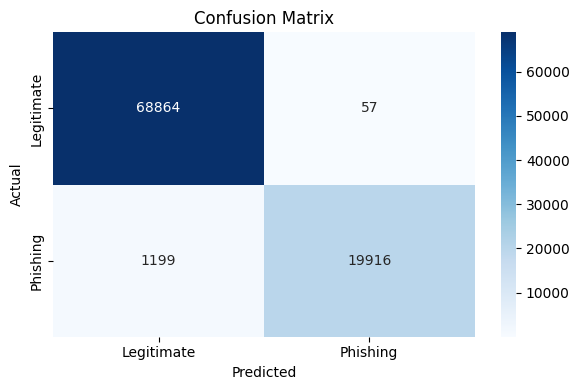

In [99]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [102]:
joblib.dump(model,'phishing_modelv1.pkl')

['phishing_modelv1.pkl']